# University of Idaho DataScience 2020 Competition

## Collin Heist

In [20]:
import numpy as np              # Numpy
import matplotlib.pyplot as plt # Plotting
import seaborn as sns           # Better plotting
import pandas as pd             # Nice 2D viewing
import keras                    # Neural Network Stuff

Using TensorFlow backend.


In [62]:
test_set = np.load('Data/test_set.npy')
train_data = np.load('Data/train_data.npy').reshape((8000, 64, 64, 1))
train_labels = np.load('Data/train_labels.npy')
train_labels = keras.utils.to_categorical(train_labels)

small_test_data = test_set[:len(test_set)//10]
small_train_data = train_data[:len(train_data)//10]
small_train_labels = train_labels[:len(train_labels)//10]

In [162]:
def expression_map(index):
    return ['x', 'x^2', 'x^3', 'x^4', '2x', '3x^2', '4x^3', 'x^2 / 2', 'x^3 / 3', '1/4 x^4', 'x^5 / 5', '+C', '1/2 t^2', 't^3 / 3', 't^4 / 4', '1/5 t^5'][index]

expression_map = np.vectorize(expression_map)

In [ ]:
def subdivide_data(x, y, test_percentage=0.025):
    assert len(x) == len(y), "Lengths of x and y must be equal."
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    
    return {"X-Train": x[indices][:int(len(x) * (1.0 - test_percentage))],
            "Y-Train": y[indices][:int(len(x) * (1.0 - test_percentage))],
            "X-Test": x[indices][-int(len(x) * test_percentage):],
            "Y-Test": y[indices][-int(len(x) * test_percentage):]}

In [1]:
data_dict = subdivide_data(train_data, train_labels, 0.03)

NameError: name 'subdivide_data' is not defined

In [166]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', input_shape=(64, 64, 1)))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [167]:
model.fit(train_data, train_labels, epochs=5);

Epoch 1/5
8000/8000 [==============================] - 280s 35ms/step - loss: 0.7688 - accuracy: 0.7369
Epoch 2/5
8000/8000 [==============================] - 284s 36ms/step - loss: 0.2853 - accuracy: 0.8992
Epoch 3/5
8000/8000 [==============================] - 250s 31ms/step - loss: 0.0921 - accuracy: 0.9679
Epoch 4/5
8000/8000 [==============================] - 235s 29ms/step - loss: 0.0417 - accuracy: 0.9859
Epoch 5/5
8000/8000 [==============================] - 248s 31ms/step - loss: 0.0301 - accuracy: 0.9920


In [165]:
model.fit(small_train_data, small_train_labels, epochs=5);

Epoch 1/5
800/800 [==============================] - 27s 33ms/step - loss: 1.5080 - accuracy: 0.5325
Epoch 2/5
800/800 [==============================] - 45s 56ms/step - loss: 0.5393 - accuracy: 0.8363
Epoch 3/5
800/800 [==============================] - 57s 72ms/step - loss: 0.1531 - accuracy: 0.9475
Epoch 4/5
800/800 [==============================] - 54s 67ms/step - loss: 0.0756 - accuracy: 0.9837
Epoch 5/5
800/800 [==============================] - 35s 43ms/step - loss: 0.0389 - accuracy: 0.9900


[['1/4 x^4' 'x^3' 'x^2 / 2' '1/4 x^4' 'x^3 / 3']
 ['t^4 / 4' 'x^2 / 2' '1/5 t^5' 'x^3 / 3' 'x^5 / 5']
 ['x^2' 'x^2' '1/4 x^4' '4x^3' 'x^4']
 ['x^2' '4x^3' 'x^5 / 5' '+C' 'x']
 ['1/5 t^5' 'x^5 / 5' '3x^2' 'x^3 / 3' 'x^4']]


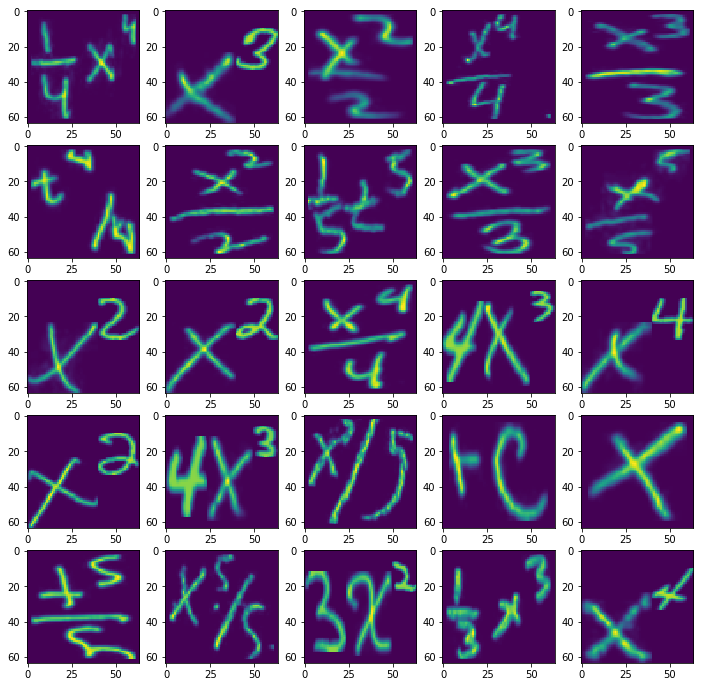

In [163]:
plt.figure(figsize=(12, 12))
for i, img in enumerate(small_train_data[:25]):
    plt.subplot(5, 5, i+1)
    plt.imshow(img[:, :, 0])
    
with np.printoptions(precision=2):
    print (expression_map(np.argmax(model.predict(small_train_data[:25]), axis=1).reshape(5, 5)))